As a data analyst for a marketing team, you are tasked with evaluating the performance of two marketing campaigns aimed at different email domains. You have a database with information about user demographics, email domains, and the number of purchases made by each user.

Analyze the conversion rates for different email domains. Calculate the conversion rate for each email domain (number of purchases divided by the number of users) and compare them. Determine which email domains have the highest and lowest conversion rates.

Conduct statistical testing to determine if there is a significant difference in the average total spent between users who signed up with different email domains. Use appropriate hypothesis testing techniques and provide insights based on the results.

Identify the top three favorite product categories for users based on their email domain. Calculate the average total spent for each product category and compare them across different email domains. Provide recommendations on how to target each email domain based on their preferences.

In [170]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [171]:
df = pd.read_csv('/Users/mikeredshaw/Documents/Schulich MBAN/MBAN 6110 - Data Science/module_5_feature_engineering_inclass.csv')

In [172]:
df.head()

,user_id,age,signup_date,last_purchase_date,total_purchases,total_spent,favorite_product_category,location,gender,email_domain
0,1,33,1978-11-01 17:03,2020-05-11 4:13,10,840.954993,books,Lake Gerald,female,gmail.com
1,2,32,2016-04-08 14:19,1959-01-07 5:45,2,1147.412095,books,North Justinburgh,male,yahoo.com
2,3,19,2021-03-08 7:01,2006-10-29 16:56,6,1301.284835,books,West Alec,female,yahoo.com
3,4,48,2006-01-11 11:04,1966-07-01 20:22,8,1404.261405,books,Annaton,male,hotmail.com
4,5,75,1985-06-16 1:41,2013-05-14 12:44,3,1968.752964,books,East Markburgh,female,yahoo.com


In [173]:
df.info

<bound method DataFrame.info of      user_id  age       signup_date last_purchase_date  total_purchases   
0          1   33  1978-11-01 17:03    2020-05-11 4:13               10  \
1          2   32  2016-04-08 14:19    1959-01-07 5:45                2   
2          3   19   2021-03-08 7:01   2006-10-29 16:56                6   
3          4   48  2006-01-11 11:04   1966-07-01 20:22                8   
4          5   75   1985-06-16 1:41   2013-05-14 12:44                3   
..       ...  ...               ...                ...              ...   
995      996   69   1994-01-02 1:26    2002-12-06 1:07               48   
996      997   35  1957-10-19 19:41    1977-07-19 0:45               45   
997      998   49   1970-01-23 0:10    1986-11-01 4:45               38   
998      999   61  2016-02-26 21:04   1952-01-11 10:28               12   
999     1000   50   1982-02-02 7:25   2010-04-24 10:07               30   

     total_spent favorite_product_category               location  

In [174]:
df.describe(include='all')

,user_id,age,signup_date,last_purchase_date,total_purchases,total_spent,favorite_product_category,location,gender,email_domain
count,1000.000000,1000.000000,1000,1000,1000.000000,1000.000000,1000,1000,1000,1000
unique,NaN,NaN,1000,1000,NaN,NaN,5,968,2,3
top,NaN,NaN,1978-11-01 17:03,2020-05-11 4:13,NaN,NaN,books,Port Amy,female,yahoo.com
freq,NaN,NaN,1,1,NaN,NaN,230,2,504,337
mean,500.500000,48.769000,NaN,NaN,24.553000,1006.185110,NaN,NaN,NaN,NaN
std,288.819436,17.924758,NaN,NaN,14.221091,565.591399,NaN,NaN,NaN,NaN
min,1.000000,18.000000,NaN,NaN,1.000000,21.674472,NaN,NaN,NaN,NaN
25%,250.750000,33.000000,NaN,NaN,12.000000,505.387035,NaN,NaN,NaN,NaN
50%,500.500000,49.000000,NaN,NaN,24.000000,1015.924107,NaN,NaN,NaN,NaN
75%,750.250000,65.000000,NaN,NaN,37.250000,1470.408267,NaN,NaN,NaN,NaN


In [175]:
df.dtypes

user_id                        int64
age                            int64
signup_date                   object
last_purchase_date            object
total_purchases                int64
total_spent                  float64
favorite_product_category     object
location                      object
gender                        object
email_domain                  object
dtype: object

In [176]:
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [177]:
df['last_purchase_date'] = pd.to_datetime(df['last_purchase_date'])

In [178]:
df.dtypes

user_id                               int64
age                                   int64
signup_date                  datetime64[ns]
last_purchase_date           datetime64[ns]
total_purchases                       int64
total_spent                         float64
favorite_product_category            object
location                             object
gender                               object
email_domain                         object
dtype: object

In [179]:
df.insert(df.columns.get_loc('total_spent'), 'Unit_Price', df['total_spent'] / df['total_purchases'])


In [180]:
df

,user_id,age,signup_date,last_purchase_date,total_purchases,Unit_Price,total_spent,favorite_product_category,location,gender,email_domain
0,1,33,1978-11-01 17:03:00,2020-05-11 04:13:00,10,84.095499,840.954993,books,Lake Gerald,female,gmail.com
1,2,32,2016-04-08 14:19:00,1959-01-07 05:45:00,2,573.706047,1147.412095,books,North Justinburgh,male,yahoo.com
2,3,19,2021-03-08 07:01:00,2006-10-29 16:56:00,6,216.880806,1301.284835,books,West Alec,female,yahoo.com
3,4,48,2006-01-11 11:04:00,1966-07-01 20:22:00,8,175.532676,1404.261405,books,Annaton,male,hotmail.com
4,5,75,1985-06-16 01:41:00,2013-05-14 12:44:00,3,656.250988,1968.752964,books,East Markburgh,female,yahoo.com
...,...,...,...,...,...,...,...,...,...,...,...
995,996,69,1994-01-02 01:26:00,2002-12-06 01:07:00,48,29.076447,1395.669474,home,Cynthiaborough,female,gmail.com
996,997,35,1957-10-19 19:41:00,1977-07-19 00:45:00,45,2.911143,131.001416,electronics,North Christopherside,female,gmail.com
997,998,49,1970-01-23 00:10:00,1986-11-01 04:45:00,38,2.701677,102.663709,electronics,Castroland,male,hotmail.com
998,999,61,2016-02-26 21:04:00,1952-01-11 10:28:00,12,85.169833,1022.037997,clothing,Salasmouth,female,hotmail.com


In [181]:
df['Unit_Price'] = df['Unit_Price'].round(2)

In [182]:
df['total_spent'] = df['total_spent'].round(2)

In [183]:
df.head(10)

,user_id,age,signup_date,last_purchase_date,total_purchases,Unit_Price,total_spent,favorite_product_category,location,gender,email_domain
0,1,33,1978-11-01 17:03:00,2020-05-11 04:13:00,10,84.10,840.95,books,Lake Gerald,female,gmail.com
1,2,32,2016-04-08 14:19:00,1959-01-07 05:45:00,2,573.71,1147.41,books,North Justinburgh,male,yahoo.com
2,3,19,2021-03-08 07:01:00,2006-10-29 16:56:00,6,216.88,1301.28,books,West Alec,female,yahoo.com
3,4,48,2006-01-11 11:04:00,1966-07-01 20:22:00,8,175.53,1404.26,books,Annaton,male,hotmail.com
4,5,75,1985-06-16 01:41:00,2013-05-14 12:44:00,3,656.25,1968.75,books,East Markburgh,female,yahoo.com
5,6,76,1960-02-12 12:06:00,1996-10-02 14:24:00,46,41.34,1901.81,home,Port Melanie,female,yahoo.com
6,7,53,1987-01-08 00:35:00,1974-05-06 13:57:00,34,5.04,171.23,electronics,West Erin,female,yahoo.com
7,8,57,1979-12-24 05:37:00,2008-09-10 15:42:00,18,96.65,1739.61,electronics,Antonioview,female,yahoo.com
8,9,52,1980-12-22 23:02:00,1986-02-03 05:05:00,49,21.82,1069.40,clothing,Cynthiaville,male,gmail.com
9,10,27,1995-03-21 04:45:00,1998-08-03 08:17:00,45,26.64,1198.76,books,Tarahaven,female,yahoo.com


In [184]:
gender_spend_mean = df.groupby('gender')['total_spent'].mean()
gender_spend_total = df.groupby('gender')['total_spent'].sum()

print(gender_spend_mean, gender_spend_total)


gender
female    1000.028155
male      1012.441149
Name: total_spent, dtype: float64 gender
female    504014.19
male      502170.81
Name: total_spent, dtype: float64


In [185]:
df.groupby('gender').count()

,user_id,age,signup_date,last_purchase_date,total_purchases,Unit_Price,total_spent,favorite_product_category,location,email_domain
gender,,,,,,,,,,
female,504,504,504,504,504,504,504,504,504,504
male,496,496,496,496,496,496,496,496,496,496


<Axes: xlabel='gender', ylabel='Count'>

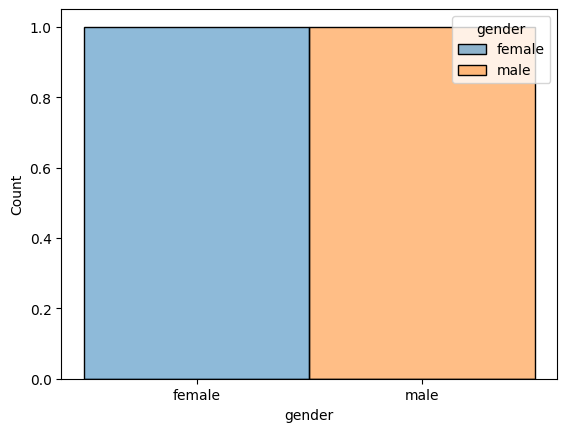

In [186]:
sns.histplot(data=gender_spend_total, x = 'gender', hue='gender')

<Axes: xlabel='gender', ylabel='total_spent'>

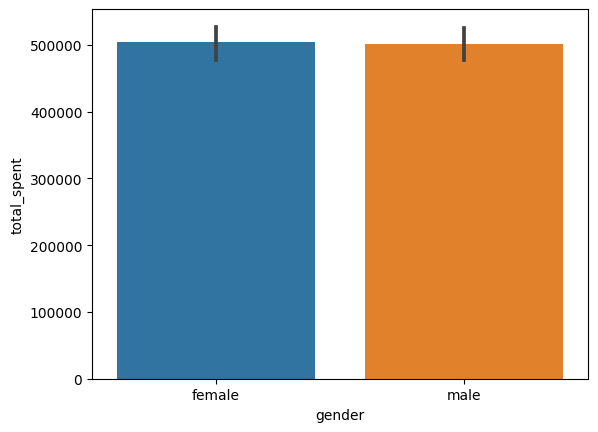

In [187]:
sns.barplot(data=df, x='gender', y='total_spent', estimator=sum)

<Axes: xlabel='gender', ylabel='Unit_Price'>

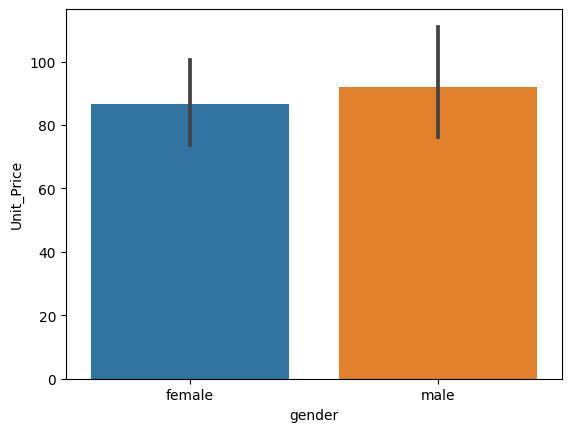

In [188]:
sns.barplot(data= df, x= 'gender', y= 'Unit_Price', estimator='mean')

In [189]:
location_group_spend = df.groupby('location')['total_spent'].aggregate(['sum', 'mean', 'median', 'count'])

In [190]:
print(location_group_spend)

                 sum     mean   median  count
location                                     
Aaronfurt     189.50   189.50   189.50      1
Aaronmouth   1250.37  1250.37  1250.37      1
Aaronview     550.70   550.70   550.70      1
Adamshaven    131.06   131.06   131.06      1
Alexisburgh  1017.91  1017.91  1017.91      1
...              ...      ...      ...    ...
Wrightbury    263.07   263.07   263.07      1
Youngfurt    1057.79  1057.79  1057.79      1
Youngland     621.09   621.09   621.09      1
Youngton      672.45   672.45   672.45      1
Yvonneburgh  1461.92  1461.92  1461.92      1

[968 rows x 4 columns]


In [191]:
location_group_spend[location_group_spend['count']>2]

,sum,mean,median,count
location,,,,


<Axes: xlabel='Unit_Price', ylabel='total_purchases'>

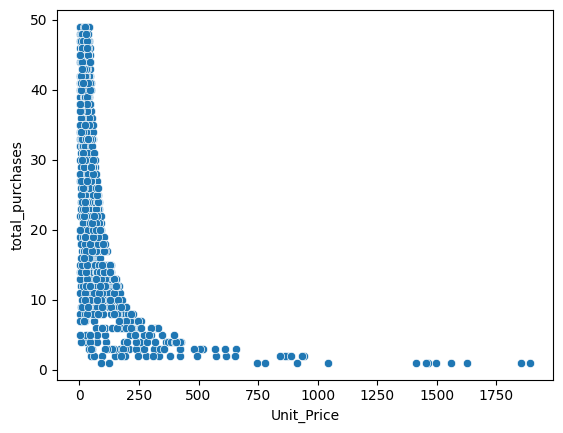

In [192]:
sns.scatterplot(data = df, y= 'total_purchases', x='Unit_Price')

In [193]:
df.describe()

,user_id,age,signup_date,last_purchase_date,total_purchases,Unit_Price,total_spent
count,1000.000000,1000.000000,1000,1000,1000.000000,1000.00000,1000.000000
mean,500.500000,48.769000,1986-11-15 06:51:55.560000,1986-10-10 11:00:36.060000,24.553000,89.37809,1006.185000
min,1.000000,18.000000,1950-03-30 23:25:00,1950-01-13 12:23:00,1.000000,0.79000,21.670000
25%,250.750000,33.000000,1969-03-18 13:58:15,1968-09-10 12:57:45,12.000000,21.66750,505.382500
50%,500.500000,49.000000,1986-03-28 10:53:00,1987-04-11 06:07:00,24.000000,41.78000,1015.925000
75%,750.250000,65.000000,2005-03-16 06:02:45,2005-03-05 00:57:15,37.250000,79.63000,1470.407500
max,1000.000000,79.000000,2023-04-14 23:02:00,2023-05-23 02:44:00,49.000000,1893.69000,1999.000000
std,288.819436,17.924758,NaN,NaN,14.221091,181.34351,565.591411


In [194]:
df[df['Unit_Price'] > 1000]

,user_id,age,signup_date,last_purchase_date,total_purchases,Unit_Price,total_spent,favorite_product_category,location,gender,email_domain
94,95,36,2012-06-25 01:54:00,1956-03-11 10:00:00,1,1893.69,1893.69,beauty,North Adamstad,male,hotmail.com
95,96,74,2009-06-02 00:07:00,1972-05-11 07:28:00,1,1045.44,1045.44,home,New Brandonfurt,female,hotmail.com
312,313,34,1959-02-26 05:03:00,1981-02-21 07:12:00,1,1853.07,1853.07,electronics,Garciatown,male,hotmail.com
333,334,26,1952-06-25 02:29:00,1972-08-31 11:14:00,1,1463.44,1463.44,books,Lake Jamietown,male,gmail.com
420,421,46,1952-11-22 11:54:00,1989-06-01 18:16:00,1,1496.67,1496.67,books,East Sheri,male,gmail.com
485,486,21,1963-07-17 02:44:00,1992-06-30 12:06:00,1,1628.00,1628.00,beauty,Reedmouth,female,yahoo.com
505,506,44,2000-09-03 00:20:00,1979-03-22 05:12:00,1,1453.97,1453.97,electronics,Caldwellside,male,gmail.com
515,516,52,1985-08-10 11:58:00,1987-11-21 21:58:00,1,1560.72,1560.72,clothing,Whiteheadbury,male,hotmail.com
657,658,65,1985-08-09 06:54:00,1954-09-23 03:40:00,1,1414.19,1414.19,electronics,Cunninghamport,female,gmail.com


In [195]:
conditions = [
    (df['age'] <= 18),  # Youth
    (df['age'].between(19, 30)),  # Young adult
    (df['age'].between(31, 60)),  # Adult
    (df['age'] > 60)  # Senior
]
age_cohort = ['Youth', 'Young Adult', 'Adult', 'Senior']
df['age_cohort'] = np.select(conditions, age_cohort, default=pd.NA)
print(df)


     user_id  age         signup_date  last_purchase_date  total_purchases   
0          1   33 1978-11-01 17:03:00 2020-05-11 04:13:00               10  \
1          2   32 2016-04-08 14:19:00 1959-01-07 05:45:00                2   
2          3   19 2021-03-08 07:01:00 2006-10-29 16:56:00                6   
3          4   48 2006-01-11 11:04:00 1966-07-01 20:22:00                8   
4          5   75 1985-06-16 01:41:00 2013-05-14 12:44:00                3   
..       ...  ...                 ...                 ...              ...   
995      996   69 1994-01-02 01:26:00 2002-12-06 01:07:00               48   
996      997   35 1957-10-19 19:41:00 1977-07-19 00:45:00               45   
997      998   49 1970-01-23 00:10:00 1986-11-01 04:45:00               38   
998      999   61 2016-02-26 21:04:00 1952-01-11 10:28:00               12   
999     1000   50 1982-02-02 07:25:00 2010-04-24 10:07:00               30   

     Unit_Price  total_spent favorite_product_category         

In [196]:
df

,user_id,age,signup_date,last_purchase_date,total_purchases,Unit_Price,total_spent,favorite_product_category,location,gender,email_domain,age_cohort
0,1,33,1978-11-01 17:03:00,2020-05-11 04:13:00,10,84.10,840.95,books,Lake Gerald,female,gmail.com,Adult
1,2,32,2016-04-08 14:19:00,1959-01-07 05:45:00,2,573.71,1147.41,books,North Justinburgh,male,yahoo.com,Adult
2,3,19,2021-03-08 07:01:00,2006-10-29 16:56:00,6,216.88,1301.28,books,West Alec,female,yahoo.com,Young Adult
3,4,48,2006-01-11 11:04:00,1966-07-01 20:22:00,8,175.53,1404.26,books,Annaton,male,hotmail.com,Adult
4,5,75,1985-06-16 01:41:00,2013-05-14 12:44:00,3,656.25,1968.75,books,East Markburgh,female,yahoo.com,Senior
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,69,1994-01-02 01:26:00,2002-12-06 01:07:00,48,29.08,1395.67,home,Cynthiaborough,female,gmail.com,Senior
996,997,35,1957-10-19 19:41:00,1977-07-19 00:45:00,45,2.91,131.00,electronics,North Christopherside,female,gmail.com,Adult
997,998,49,1970-01-23 00:10:00,1986-11-01 04:45:00,38,2.70,102.66,electronics,Castroland,male,hotmail.com,Adult
998,999,61,2016-02-26 21:04:00,1952-01-11 10:28:00,12,85.17,1022.04,clothing,Salasmouth,female,hotmail.com,Senior


In [199]:
df.insert(df.columns.get_loc('age') + 1, 'age_cohort', df.pop('age_cohort'))

In [200]:
df

,user_id,age,age_cohort,signup_date,last_purchase_date,total_purchases,Unit_Price,total_spent,favorite_product_category,location,gender,email_domain
0,1,33,Adult,1978-11-01 17:03:00,2020-05-11 04:13:00,10,84.10,840.95,books,Lake Gerald,female,gmail.com
1,2,32,Adult,2016-04-08 14:19:00,1959-01-07 05:45:00,2,573.71,1147.41,books,North Justinburgh,male,yahoo.com
2,3,19,Young Adult,2021-03-08 07:01:00,2006-10-29 16:56:00,6,216.88,1301.28,books,West Alec,female,yahoo.com
3,4,48,Adult,2006-01-11 11:04:00,1966-07-01 20:22:00,8,175.53,1404.26,books,Annaton,male,hotmail.com
4,5,75,Senior,1985-06-16 01:41:00,2013-05-14 12:44:00,3,656.25,1968.75,books,East Markburgh,female,yahoo.com
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,69,Senior,1994-01-02 01:26:00,2002-12-06 01:07:00,48,29.08,1395.67,home,Cynthiaborough,female,gmail.com
996,997,35,Adult,1957-10-19 19:41:00,1977-07-19 00:45:00,45,2.91,131.00,electronics,North Christopherside,female,gmail.com
997,998,49,Adult,1970-01-23 00:10:00,1986-11-01 04:45:00,38,2.70,102.66,electronics,Castroland,male,hotmail.com
998,999,61,Senior,2016-02-26 21:04:00,1952-01-11 10:28:00,12,85.17,1022.04,clothing,Salasmouth,female,hotmail.com
